In [1]:
import pandas as pd

In [41]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [42]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


In [44]:
df.sex.value_counts()
df.sex = df.sex.map({'F':0, 'M':1})
df.activities = df.activities.map({'no':0, 'yes':1})
df.romantic = df.romantic.map({'no':0, 'yes':1})
df.internet = df.internet.map({'no':0, 'yes':1})
df.schoolsup = df.schoolsup.map({'no':0, 'yes':1})
df.famsup = df.famsup.map({'no':0, 'yes':1})
df.paid = df.paid.map({'no':0, 'yes':1})

df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,18,GT3,A,2,2,1,0,0,0,0,0,4,3,4,6,6
1,0,17,GT3,T,1,2,0,1,0,0,1,0,5,3,3,4,6
2,0,15,LE3,T,1,2,1,0,1,0,1,0,4,3,2,10,10
3,0,15,GT3,T,1,3,0,1,1,1,1,1,3,2,2,2,15
4,0,16,GT3,T,1,2,0,1,1,0,0,0,4,3,2,4,10


In [50]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False)

Series([], dtype: int64)

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'activities'}>],
       [<AxesSubplot:title={'center':'internet'}>,
        <AxesSubplot:title={'center':'romantic'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>]],
      dtype=object)

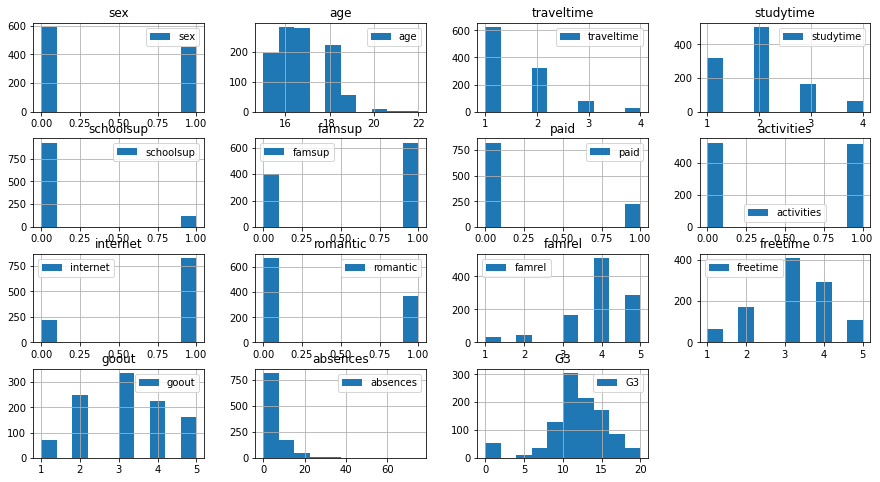

In [60]:
df.hist(figsize=[15,8], legend = True)

In [56]:
df.describe()

,sex,age,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.433908,16.726054,1.522989,1.970307,0.113985,0.613027,0.210728,0.494253,0.792146,0.355364,3.935824,3.201149,3.156130,4.434866,11.341954
std,0.495850,1.239975,0.731727,0.834353,0.317945,0.487291,0.408021,0.500207,0.405967,0.478853,0.933401,1.031507,1.152575,6.210017,3.864796
min,0.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,0.000000,17.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,1.000000,18.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,20.000000
